In [ ]:
!wget /path/to/metric_results_set1.pkl
!wget /path/to/metric_results_set2.pkl
!wget /path/to/metric_results_MOTS20.pkl

import pandas as pd

results_df_set1 = pd.read_pickle('metric_results_set1.pkl')
results_df_set2 = pd.read_pickle('metric_results_set2.pkl')
results_df_MOTS20 = pd.read_pickle('metric_results_MOTS20.pkl')

results_df = pd.concat([results_df_set1, results_df_set2, results_df_MOTS20], ignore_index=True)

results_df

In [2]:
columns_to_multiply = [
    'MOTA', 'MOTP', 'DETA', 'ASSA', 'HOTA', 'Segmentation IOU',
    'Detection Precision', 'Detection Recall', 'Detection F-Score',
    'Association Precision', 'Association Recall', 'Association F-Score',
    'Association Precision Legacy', 'Association Recall Legacy',
    'Association F-Score Legacy'
]

results_df[columns_to_multiply] = results_df[columns_to_multiply] * 100

In [3]:
# Rename columns
results_df.rename(columns={
    'ASSA': 'AssA',
    'Segmentation IOU': 'IoU',
    'DETA': 'DetA',
    'Association Precision': 'AP$_{50}$',
    'Association Recall': 'AR$_{50}$',
    'Association F-Score': 'AF$_{50}$'
}, inplace=True)

# Update 'Dataset' column
results_df['Dataset'] = results_df['Dataset'].replace({
    'ArrowSynth1': 'Synthetic Arrows',
    'ArrowSynthTurns': 'Synthetic Arrows TR-1',
    'ArrowSynthTurnsOften': 'Synthetic Arrows TR-2',
    'ArrowSynthShapes': 'Synthetic Amoeboids',
    'ArrowSynthShapesTP20': 'Synthetic Amoeboids RP-1/20',
    'ArrowSynthShapesTP5': 'Synthetic Amoeboids RP-1/5',
    'MOTS20': 'MOTS'
})

# Update 'Predictor' column
results_df['Predictor'] = results_df['Predictor'].replace({
    'Symmetry': 'TS',
    'SymmetryL2': 'TS-L2',
    'SymmetryShape': 'TS-Shape'
})

results_df

,Dataset,SampleID,Frame,Predictor,MOTA,MOTP,DetA,AssA,HOTA,IoU,Detection Precision,Detection Recall,Detection F-Score,AP$_{50}$,AR$_{50}$,AF$_{50}$,Association Precision Legacy,Association Recall Legacy,Association F-Score Legacy
0,Synthetic Arrows,081,0,Kalman,93.103448,17.846221,78.832969,90.186659,82.845096,90.155249,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,Synthetic Arrows,081,1,Kalman,90.000000,17.277565,76.690769,89.490522,81.385131,90.493131,100.000000,100.000000,100.000000,100.000000,93.333333,96.551724,100.000000,93.333333,96.551724
2,Synthetic Arrows,081,2,Kalman,80.000000,19.126220,72.175581,82.041904,75.252485,89.728247,100.000000,93.333333,96.551724,91.666667,84.615385,88.000000,91.666667,78.571429,84.615385
3,Synthetic Arrows,081,3,Kalman,87.096774,20.331574,74.119430,80.286248,75.814322,85.725850,93.750000,100.000000,96.774194,85.714286,85.714286,85.714286,80.000000,85.714286,82.758621
4,Synthetic Arrows,081,4,Kalman,90.322581,19.056574,73.132726,87.913196,79.054656,85.647383,94.117647,100.000000,96.969697,100.000000,100.000000,100.000000,93.333333,100.000000,96.551724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56233,MOTS,11,894,TS-Shape,9.090909,32.036928,16.428265,68.153718,33.311770,32.474227,50.000000,18.181818,26.666667,100.000000,100.000000,100.000000,50.000000,18.181818,26.666667
56234,MOTS,11,895,TS-Shape,18.181818,35.032220,16.210930,54.853801,29.530530,33.899177,50.000000,18.181818,26.666667,50.000000,50.000000,50.000000,25.000000,9.090909,13.333333
56235,MOTS,11,896,TS-Shape,0.000000,32.810735,12.635701,57.309942,26.672546,23.281222,25.000000,9.090909,13.333333,100.000000,100.000000,100.000000,25.000000,9.090909,13.333333
56236,MOTS,11,897,TS-Shape,-18.181818,29.158340,7.417904,65.380117,21.459369,18.841950,25.000000,9.090909,13.333333,100.000000,100.000000,100.000000,25.000000,9.090909,13.333333


# Comaprison plots

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Set the font family to serif
rcParams['font.family'] = 'serif'

# Use Seaborn's default settings while respecting the above font setting
sns.set(style="whitegrid", font="serif")

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Set the font family to DejaVu Serif
rcParams['font.family'] = 'Liberation Serif'

# Apply Seaborn settings
sns.set(style="whitegrid", font='Liberation Serif')

# Create a figure with subplots

In [ ]:
import matplotlib.font_manager as fm

# List all available font names
for font in fm.fontManager.ttflist:
    if 'serif' in font.name.lower():
        print(font.name)


DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
DejaVu Serif
Liberation Serif
Liberation Serif
Liberation Serif
Liberation Serif


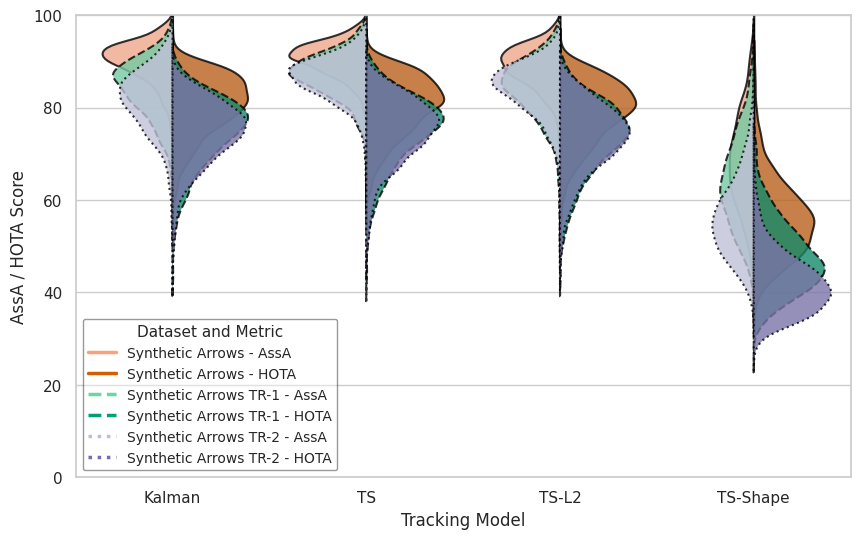

In [25]:
#@title Two-Sided Violin Plot of ASSA and HOTA Scores by ArrowSynth1 -Turns, TurnsOften

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Filter the DataFrame to include only the desired datasets
filtered_datasets = ['Synthetic Arrows', 'Synthetic Arrows TR-1', 'Synthetic Arrows TR-2']
filtered_df = results_df[results_df['Dataset'].isin(filtered_datasets)]

# Reshape the DataFrame for Seaborn
assa_df = filtered_df.copy()
assa_df['Metric'] = 'AssA'
assa_df = assa_df.rename(columns={'AssA': 'Value'})

hota_df = filtered_df.copy()
hota_df['Metric'] = 'HOTA'
hota_df = hota_df.rename(columns={'HOTA': 'Value'})

# Combine the two metrics into one DataFrame
combined_df = pd.concat([assa_df[['Dataset', 'Predictor', 'Metric', 'Value']],
                         hota_df[['Dataset', 'Predictor', 'Metric', 'Value']]])

# Define colors and edge line styles for each combination of dataset and metric

palette = {
    ('Synthetic Arrows', 'AssA'):'#FFA07A',# '#FFD580'
    ('Synthetic Arrows', 'HOTA'): '#D55E00', #'#E69F00'
    ('Synthetic Arrows TR-1', 'AssA'): '#66D8A5',
    ('Synthetic Arrows TR-1', 'HOTA'): '#009E73',
    ('Synthetic Arrows TR-2', 'AssA'): '#bcbddc',
    ('Synthetic Arrows TR-2', 'HOTA'): '#756bb1'
}


edge_styles = {
    'Synthetic Arrows': 'solid',
    'Synthetic Arrows TR-1': 'dashed',
    'Synthetic Arrows TR-2': 'dotted',
}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use a loop to plot each dataset on top of the others with different colors and edge line styles
for dataset in filtered_datasets:
    subset_df = combined_df[combined_df['Dataset'] == dataset]
    # Plot each dataset separately with its own color and edge style
    sns.violinplot(x="Predictor", y="Value", hue="Metric", data=subset_df,
                   split=True, inner=None, alpha=0.8, linewidth=1.5,
                   palette={metric: palette[(dataset, metric)] for metric in ['AssA', 'HOTA']},
                   edgecolor='black', linestyle=edge_styles[dataset])

# Customize the legend
legend_lines = []
for dataset in filtered_datasets:
    for metric in ['AssA', 'HOTA']:
        color = palette[(dataset, metric)]
        linestyle = edge_styles[dataset]
        line = Line2D([0], [0], color=color, lw=2.5, linestyle=linestyle, alpha=1)
        legend_lines.append(line)

legend = plt.legend(handles=legend_lines, labels=[f'{dataset} - {metric}' for dataset in filtered_datasets for metric in ['AssA', 'HOTA']],
                    title="Dataset and Metric", loc='lower left',
                    frameon=True, edgecolor='black', facecolor='white', framealpha=0.4, fontsize = 10)
plt.setp(legend.get_title(), fontsize='11')

plt.xlabel("Tracking Model")
plt.ylabel("AssA / HOTA Score")

plt.ylim(0,100)

plt.show()

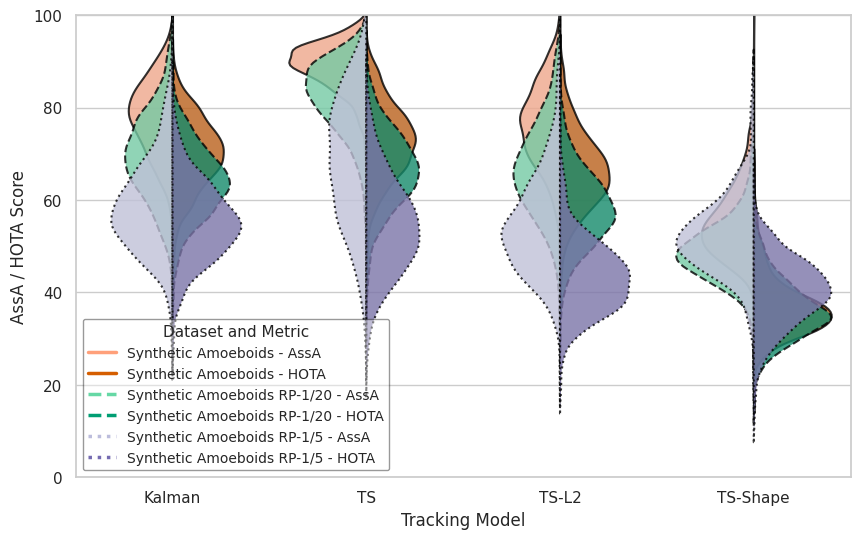

In [26]:
#@title Two-Sided Violin Plot of ASSA and HOTA Scores by the Synthetic Amoeboids
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Filter the DataFrame to include only the desired datasets
filtered_datasets = ['Synthetic Amoeboids', 'Synthetic Amoeboids RP-1/20', 'Synthetic Amoeboids RP-1/5']
filtered_df = results_df[results_df['Dataset'].isin(filtered_datasets)]

# Reshape the DataFrame for Seaborn
assa_df = filtered_df.copy()
assa_df['Metric'] = 'AssA'
assa_df = assa_df.rename(columns={'AssA': 'Value'})

hota_df = filtered_df.copy()
hota_df['Metric'] = 'HOTA'
hota_df = hota_df.rename(columns={'HOTA': 'Value'})

# Combine the two metrics into one DataFrame
combined_df = pd.concat([assa_df[['Dataset', 'Predictor', 'Metric', 'Value']],
                         hota_df[['Dataset', 'Predictor', 'Metric', 'Value']]])

# Define colors and edge line styles for each combination of dataset and metric
palette = {
    ('Synthetic Amoeboids', 'AssA'): '#FFA07A',
    ('Synthetic Amoeboids', 'HOTA'): '#D55E00',
    ('Synthetic Amoeboids RP-1/20', 'AssA'): '#66D8A5',
    ('Synthetic Amoeboids RP-1/20', 'HOTA'): '#009E73',
    ('Synthetic Amoeboids RP-1/5', 'AssA'): '#bcbddc',
    ('Synthetic Amoeboids RP-1/5', 'HOTA'): '#756bb1',
}


edge_styles = {
    'Synthetic Amoeboids': 'solid',
    'Synthetic Amoeboids RP-1/20': 'dashed',
    'Synthetic Amoeboids RP-1/5': 'dotted',
}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use a loop to plot each dataset on top of the others with different colors and edge line styles
for dataset in filtered_datasets:
    subset_df = combined_df[combined_df['Dataset'] == dataset]
    # Plot each dataset separately with its own color and edge style
    sns.violinplot(x="Predictor", y="Value", hue="Metric", data=subset_df,
                   split=True, inner=None, alpha=0.8, linewidth=1.5,
                   palette={metric: palette[(dataset, metric)] for metric in ['AssA', 'HOTA']},
                   edgecolor='black', linestyle=edge_styles[dataset])

# Customize the legend to show which color and line style corresponds to which dataset and metric
legend_lines = []
for dataset in filtered_datasets:
    for metric in ['AssA', 'HOTA']:
        color = palette[(dataset, metric)]
        linestyle = edge_styles[dataset]
        # Use Line2D for the legend entries with custom linewidth
        line = Line2D([0], [0], color=color, lw=2.5, linestyle=linestyle, alpha=1)  # Set custom linewidth here
        legend_lines.append(line)

# Create the legend with a transparent background and a black edge
legend = plt.legend(handles=legend_lines, labels=[f'{dataset} - {metric}' for dataset in filtered_datasets for metric in ['AssA', 'HOTA']],
                    title="Dataset and Metric", loc='lower left',
                    frameon=True, edgecolor='black', facecolor='white', framealpha=0.4, fontsize = 10)
plt.setp(legend.get_title(), fontsize='11')  # Customize legend title font size

#plt.title("Distribution of AssA and HOTA Scores by the Synthetic Amoeboids Datasets", fontsize=16)
plt.xlabel("Tracking Model")
plt.ylabel("AssA / HOTA Score")

plt.ylim(0,100)

plt.show()


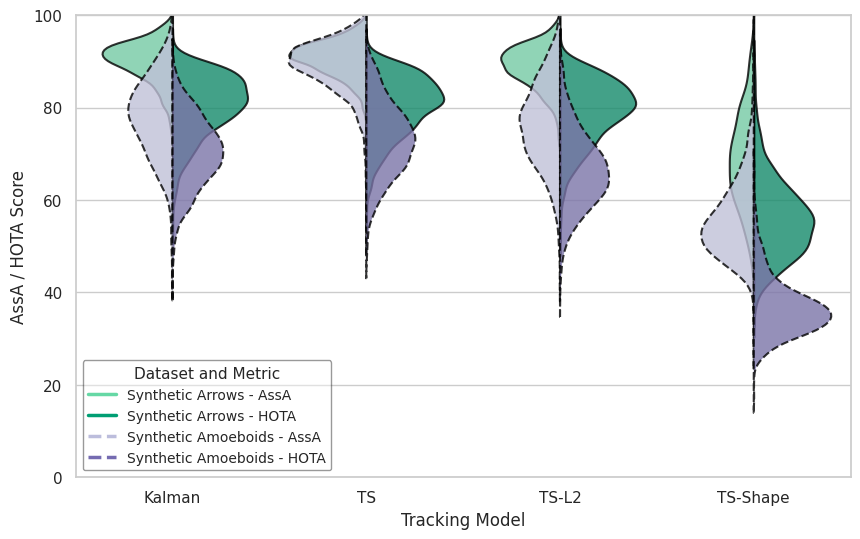

In [27]:
#@title Two-Sided Violin Plot of ASSA and HOTA Scores by the Synthetic Arrows and Synthetic Amoeboids Datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Filter the DataFrame to include only the desired datasets
filtered_datasets = ['Synthetic Arrows','Synthetic Amoeboids']
filtered_df = results_df[results_df['Dataset'].isin(filtered_datasets)]

# Reshape the DataFrame for Seaborn
assa_df = filtered_df.copy()
assa_df['Metric'] = 'AssA'
assa_df = assa_df.rename(columns={'AssA': 'Value'})

hota_df = filtered_df.copy()
hota_df['Metric'] = 'HOTA'
hota_df = hota_df.rename(columns={'HOTA': 'Value'})

# Combine the two metrics into one DataFrame
combined_df = pd.concat([assa_df[['Dataset', 'Predictor', 'Metric', 'Value']],
                         hota_df[['Dataset', 'Predictor', 'Metric', 'Value']]])

# Define colors and edge line styles for each combination of dataset and metric
"""
palette = {
    ('Synthetic Arrows', 'AssA'): '#FFA07A',
    ('Synthetic Arrows', 'HOTA'): '#D55E00',
    ('Synthetic Amoeboids', 'AssA'): '#FFD580',
    ('Synthetic Amoeboids', 'HOTA'): '#E69F00'
}
"""
palette = {
    ('Synthetic Arrows', 'AssA'): '#66D8A5',#'#FFA07A',
    ('Synthetic Arrows', 'HOTA'): '#009E73',#'#D55E00',
    ('Synthetic Amoeboids', 'AssA'): '#bcbddc',#'#66D8A5',
    ('Synthetic Amoeboids', 'HOTA'): '#756bb1'#'#009E73'
}
#'#bcbddc''#756bb1

#('Synthetic Arrows', 'AssA'):'#FFA07A',# '#FFD580'
# ('Synthetic Arrows', 'HOTA'): '#D55E00', #'#E69F00'

edge_styles = {
    'Synthetic Arrows': 'solid',
    'Synthetic Amoeboids': 'dashed',
}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use a loop to plot each dataset on top of the others with different colors and edge line styles
for dataset in filtered_datasets:
    subset_df = combined_df[combined_df['Dataset'] == dataset]
    # Plot each dataset separately with its own color and edge style
    sns.violinplot(x="Predictor", y="Value", hue="Metric", data=subset_df,
                   split=True, inner=None, alpha=0.8, linewidth=1.5,
                   palette={metric: palette[(dataset, metric)] for metric in ['AssA', 'HOTA']},
                   edgecolor='black', linestyle=edge_styles[dataset])

# Customize the legend to show which color and line style corresponds to which dataset and metric
legend_lines = []
for dataset in filtered_datasets:
    for metric in ['AssA', 'HOTA']:
        color = palette[(dataset, metric)]
        linestyle = edge_styles[dataset]
        # Use Line2D for the legend entries with custom linewidth
        line = Line2D([0], [0], color=color, lw=2.5, linestyle=linestyle, alpha=1)  # Set custom linewidth here
        legend_lines.append(line)

# Create the legend with a transparent background and a black edge
legend = plt.legend(handles=legend_lines, labels=[f'{dataset} - {metric}' for dataset in filtered_datasets for metric in ['AssA', 'HOTA']],
                    title="Dataset and Metric", loc='lower left',
                    frameon=True, edgecolor='black', facecolor='white', framealpha=0.4, fontsize = 10)
plt.setp(legend.get_title(), fontsize='11')  # Customize legend title font size

#plt.title("Distribution of AssA and HOTA Scores by the Synthetic Arrows and Synthetic Amoeboids Datasets", fontsize=16)
plt.xlabel("Tracking Model")
plt.ylabel("AssA / HOTA Score")

plt.ylim(0,100)

plt.show()


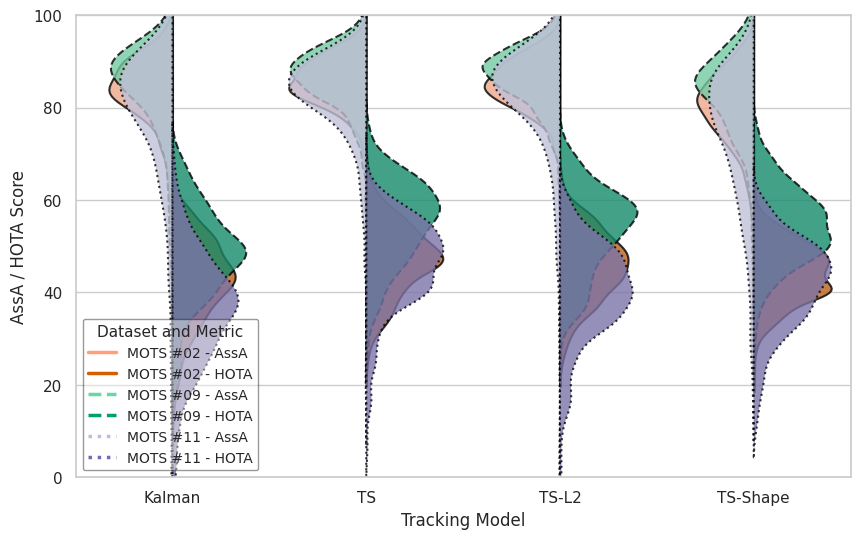

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Filter the DataFrame to include only the 'MOTS' dataset
filtered_df = results_df[results_df['Dataset'] == 'MOTS']

# Identify unique SampleID values
unique_sample_ids = filtered_df['SampleID'].unique()

# Create separate "datasets" based on SampleID
filtered_df_02 = filtered_df[filtered_df['SampleID'] == unique_sample_ids[0]]
filtered_df_09 = filtered_df[filtered_df['SampleID'] == unique_sample_ids[1]]
filtered_df_11 = filtered_df[filtered_df['SampleID'] == unique_sample_ids[2]]

# Combine the SampleID datasets into one DataFrame
combined_sample_df = pd.concat([filtered_df_02, filtered_df_09, filtered_df_11])

# Reshape the DataFrame for Seaborn
assa_df = combined_sample_df.copy()
assa_df['Metric'] = 'AssA'
assa_df = assa_df.rename(columns={'AssA': 'Value'})

hota_df = combined_sample_df.copy()
hota_df['Metric'] = 'HOTA'
hota_df = hota_df.rename(columns={'HOTA': 'Value'})

# Combine the two metrics into one DataFrame
combined_df = pd.concat([assa_df[['SampleID', 'Predictor', 'Metric', 'Value']],
                         hota_df[['SampleID', 'Predictor', 'Metric', 'Value']]])

# Define colors and edge line styles for each combination of SampleID and Metric
palette = {
    (unique_sample_ids[0], 'AssA'): '#FFA07A',  # '#FFD580'
    (unique_sample_ids[0], 'HOTA'): '#D55E00',  # '#E69F00'
    (unique_sample_ids[1], 'AssA'): '#66D8A5',
    (unique_sample_ids[1], 'HOTA'): '#009E73',
    (unique_sample_ids[2], 'AssA'): '#bcbddc',
    (unique_sample_ids[2], 'HOTA'): '#756bb1'
}

edge_styles = {
    unique_sample_ids[0]: 'solid',
    unique_sample_ids[1]: 'dashed',
    unique_sample_ids[2]: 'dotted',
}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use a loop to plot each SampleID on top of the others with different colors and edge line styles
for sample_id in unique_sample_ids:
    subset_df = combined_df[combined_df['SampleID'] == sample_id]
    sns.violinplot(x="Predictor", y="Value", hue="Metric", data=subset_df,
                   split=True, inner=None, alpha=0.8, linewidth=1.5,
                   palette={metric: palette[(sample_id, metric)] for metric in ['AssA', 'HOTA']},
                   edgecolor='black', linestyle=edge_styles[sample_id])

# Customize the legend to show which color and line style corresponds to which SampleID and Metric
legend_lines = []
dataset_name = 'MOTS'  # Assuming the dataset name is 'MOTS'
for sample_id in unique_sample_ids:
    for metric in ['AssA', 'HOTA']:
        color = palette[(sample_id, metric)]
        linestyle = edge_styles[sample_id]
        line = Line2D([0], [0], color=color, lw=2.5, linestyle=linestyle, alpha=1)  # Custom linewidth
        legend_lines.append(line)

# Create the legend with the dataset name and SampleID
legend_labels = [f'{dataset_name} #{sample_id} - {metric}' for sample_id in unique_sample_ids for metric in ['AssA', 'HOTA']]

legend = plt.legend(handles=legend_lines, labels=legend_labels,
                    title="Dataset and Metric", loc='lower left',
                    frameon=True, edgecolor='black', facecolor='white', framealpha=0.4, fontsize = 10)
plt.setp(legend.get_title(), fontsize='11')  # Customize legend title font size

plt.xlabel("Tracking Model")
plt.ylabel("AssA / HOTA Score")

plt.ylim(0, 100)

plt.show()


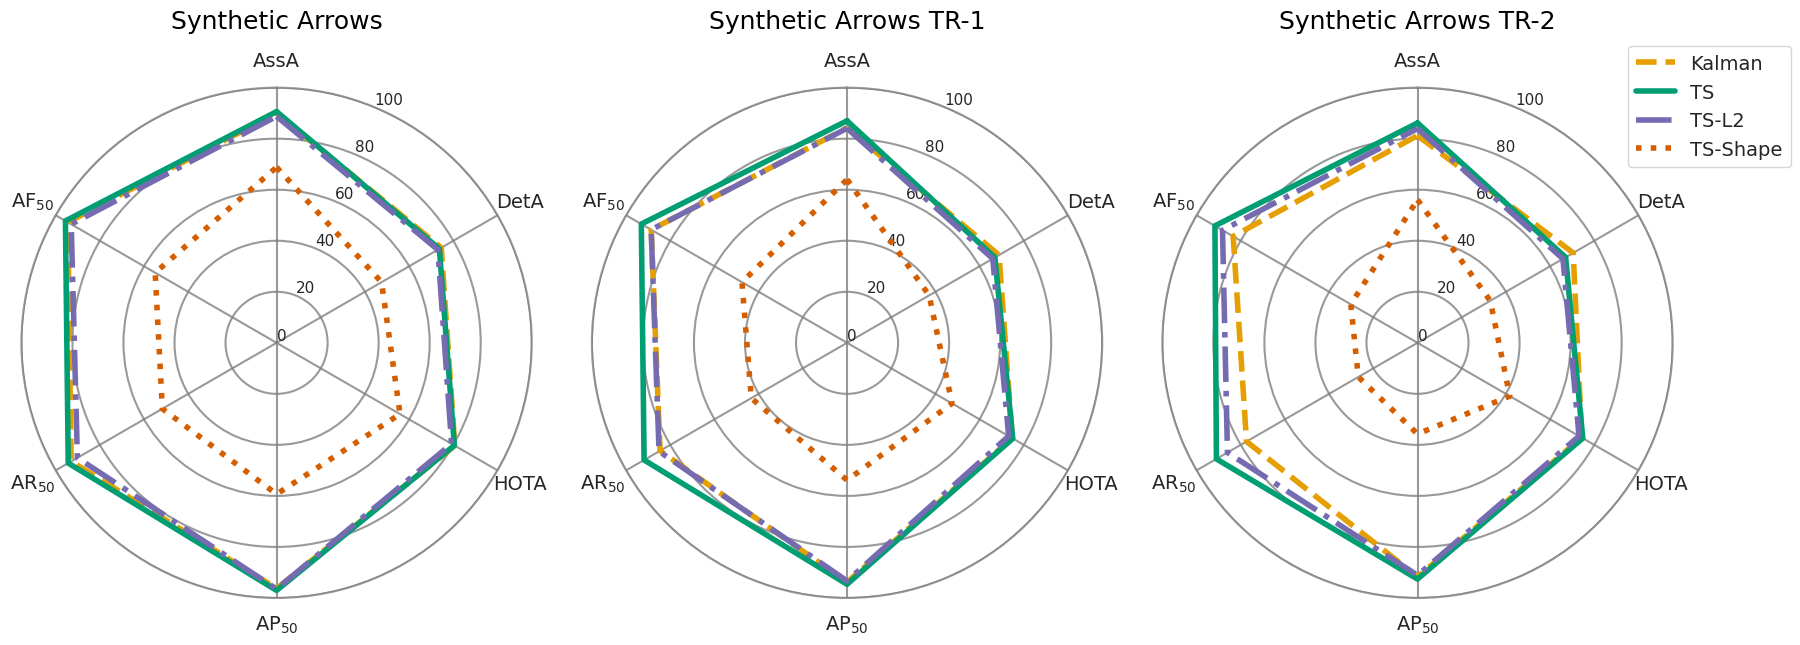

In [30]:
#@title Spider Chart of ASSA for Different Predictors in ArrowSynth1 -Turns, TurnsOften

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Filter the DataFrame to include only the desired datasets
filtered_datasets = ['Synthetic Arrows', 'Synthetic Arrows TR-1', 'Synthetic Arrows TR-2']
filtered_df = results_df[results_df['Dataset'].isin(filtered_datasets)]

# Select the metrics you want to include in the radar charts
selected_metrics = ['AssA', 'DetA', 'HOTA', "AP$_{50}$", 'AR$_{50}$', 'AF$_{50}$']

# Initialize a dictionary to hold data for plotting
data_dict = {
    'Dataset': [],
    'Predictor': [],
    'Metric': [],
    'Value': []
}

# Loop over each dataset, predictor, and metric to prepare data
for dataset in filtered_df['Dataset'].unique():
    for predictor in filtered_df['Predictor'].unique():
        for metric in selected_metrics:
            # Extract the value for each combination of Dataset, Predictor, and Metric
            metric_value = filtered_df[
                (filtered_df['Dataset'] == dataset) &
                (filtered_df['Predictor'] == predictor)
            ][metric]

            # If there's data, append it; otherwise, append NaN or 0
            if not metric_value.empty:
                value = np.mean(metric_value)
            else:
                value = np.nan  # or 0, depending on your use case

            data_dict['Dataset'].append(dataset)
            data_dict['Predictor'].append(predictor)
            data_dict['Metric'].append(metric)
            data_dict['Value'].append(value)

# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data_dict)

# Radar chart setup
num_metrics = len(selected_metrics)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # Complete the loop

"""
palette = {
    ('Synthetic Amoeboids', 'AssA'): '#FFA07A',
    ('Synthetic Amoeboids', 'HOTA'): '#D55E00',
    ('Synthetic Amoeboids RP-1/20', 'AssA'): '#66D8A5',
    ('Synthetic Amoeboids RP-1/20', 'HOTA'): '#009E73',
    ('Synthetic Amoeboids RP-1/5', 'AssA'): '#bcbddc',
    ('Synthetic Amoeboids RP-1/5', 'HOTA'): '#756bb1',
}
"""
# Define color palette and line styles for accessibility '#F0E442', '#56B4E9','#CC79A7'
colors = [ '#E69F00','#009E73', '#756bb1', '#D55E00']
line_styles = [  '--','-','-.',':']
line_width = 4  # Increase line width

spider_linewidth = 1.5
spider_color = '#808080'
spider_alpha = 0.8

# Create a radar chart for each dataset
fig, axs = plt.subplots(1, 3, subplot_kw={'polar': True}, figsize=(18, 6))

# Uniform radial limits
radial_limit = 100
tick_interval = 20

for i, dataset in enumerate(filtered_datasets):
    ax = axs[i]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(selected_metrics, fontsize=14)  # Reduce font size for labels
    ax.tick_params(pad=6)

    # Set the radial ticks and limit
    ax.set_ylim(0, radial_limit)
    ax.yaxis.set_tick_params(labelsize=11)
    ax.set_yticks(np.arange(0, radial_limit + tick_interval, tick_interval))

    # Make the spider background (grid lines and circular grid) more visible
    ax.grid(linewidth=spider_linewidth, alpha=spider_alpha, color=spider_color)
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_linewidth(spider_linewidth)
    ax.spines['polar'].set_alpha(spider_alpha)
    ax.spines['polar'].set_color(spider_color)

    for j, predictor in enumerate(filtered_df['Predictor'].unique()):
        values = data_df[(data_df['Dataset'] == dataset) &
                         (data_df['Predictor'] == predictor)]['Value'].tolist()
        values += values[:1]  # Complete the loop

        # Choose a color and line style for each predictor
        color = colors[j % len(colors)]
        linestyle = line_styles[j % len(line_styles)]

        ax.plot(angles, values, linestyle=linestyle, linewidth=line_width, color=color, label=predictor)

    ax.set_title(f"{dataset}", size=18, color='black', y=1.1)  # Smaller title font size

    if i == len(filtered_datasets) - 1:
      ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=14) # Adjust legend position and font size

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

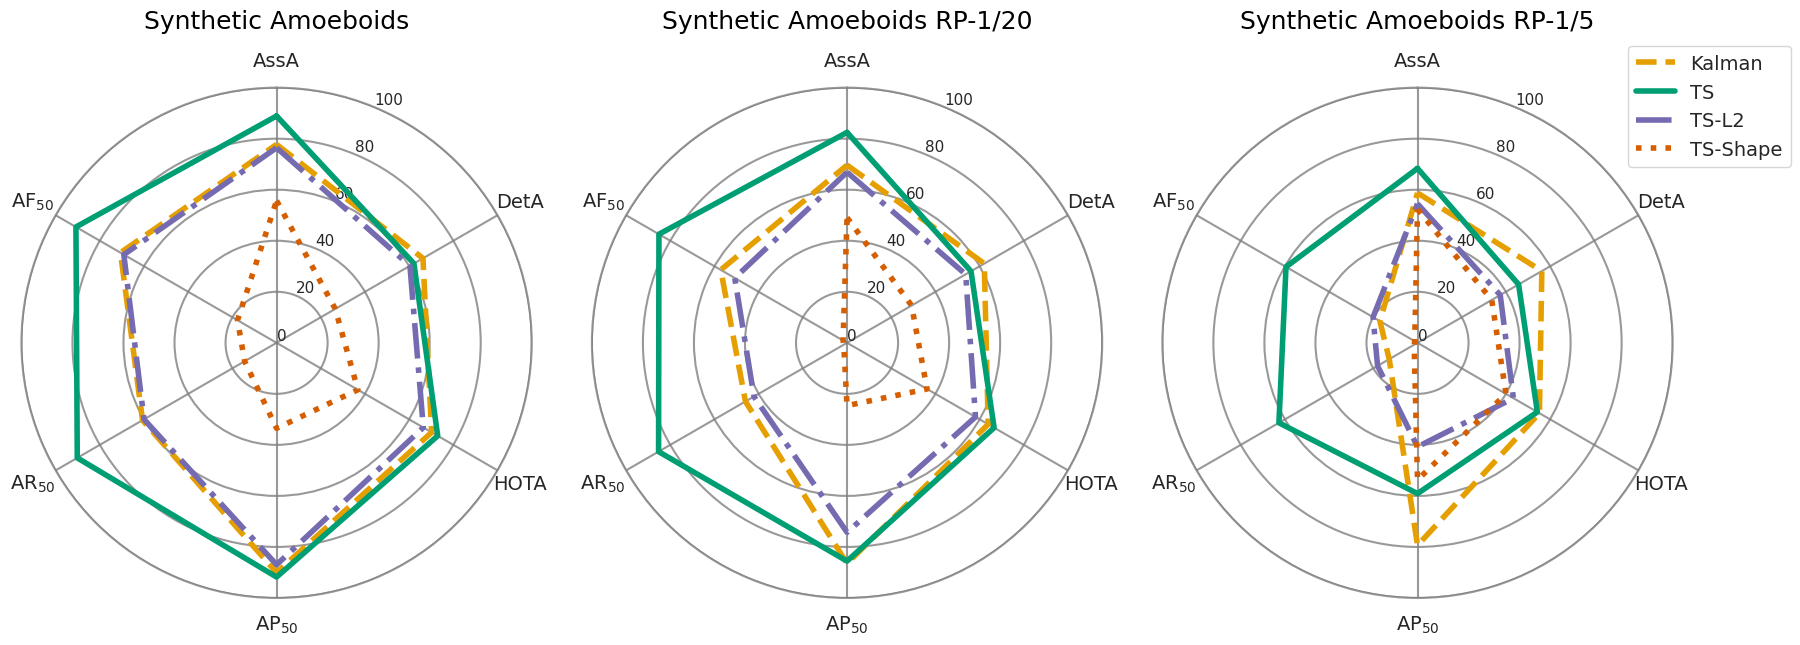

In [31]:
#@title Spider Chart of ASSA for Different Predictors in Synthetic Amoeboids

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Filter the DataFrame to include only the desired datasets
filtered_datasets = ['Synthetic Amoeboids', 'Synthetic Amoeboids RP-1/20', 'Synthetic Amoeboids RP-1/5']
filtered_df = results_df[results_df['Dataset'].isin(filtered_datasets)]

# Select the metrics you want to include in the radar charts
selected_metrics = ['AssA', 'DetA', 'HOTA', "AP$_{50}$", 'AR$_{50}$', 'AF$_{50}$']

# Initialize a dictionary to hold data for plotting
data_dict = {
    'Dataset': [],
    'Predictor': [],
    'Metric': [],
    'Value': []
}

# Loop over each dataset, predictor, and metric to prepare data
for dataset in filtered_df['Dataset'].unique():
    for predictor in filtered_df['Predictor'].unique():
        for metric in selected_metrics:
            # Extract the value for each combination of Dataset, Predictor, and Metric
            metric_value = filtered_df[
                (filtered_df['Dataset'] == dataset) &
                (filtered_df['Predictor'] == predictor)
            ][metric]

            # If there's data, append it; otherwise, append NaN or 0
            if not metric_value.empty:
                value = np.mean(metric_value)
            else:
                value = np.nan  # or 0, depending on your use case

            data_dict['Dataset'].append(dataset)
            data_dict['Predictor'].append(predictor)
            data_dict['Metric'].append(metric)
            data_dict['Value'].append(value)

# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data_dict)

# Radar chart setup
num_metrics = len(selected_metrics)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # Complete the loop

# Define color palette and line styles for accessibility '#F0E442', '#56B4E9',
colors = [ '#E69F00','#009E73', '#756bb1', '#D55E00']
line_styles = [ '--','-', '-.',':']
line_width = 4  # Increase line width

spider_linewidth = 1.5
spider_color = '#808080'
spider_alpha = 0.8

# Create a radar chart for each dataset
fig, axs = plt.subplots(1, 3, subplot_kw={'polar': True}, figsize=(18, 6))

# Uniform radial limits
radial_limit = 100
tick_interval = 20

for i, dataset in enumerate(filtered_datasets):
    ax = axs[i]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(selected_metrics, fontsize=14)  # Reduce font size for labels
    ax.tick_params(pad=6)

    # Set the radial ticks and limit
    ax.set_ylim(0, radial_limit)
    ax.yaxis.set_tick_params(labelsize=11)
    ax.set_yticks(np.arange(0, radial_limit + tick_interval, tick_interval))

    # Make the spider background (grid lines and circular grid) more visible
    ax.grid(linewidth=spider_linewidth, alpha=spider_alpha, color=spider_color)
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_linewidth(spider_linewidth)
    ax.spines['polar'].set_alpha(spider_alpha)
    ax.spines['polar'].set_color(spider_color)

    for j, predictor in enumerate(filtered_df['Predictor'].unique()):
        values = data_df[(data_df['Dataset'] == dataset) &
                         (data_df['Predictor'] == predictor)]['Value'].tolist()
        values += values[:1]  # Complete the loop

        # Choose a color and line style for each predictor
        color = colors[j % len(colors)]
        linestyle = line_styles[j % len(line_styles)]

        ax.plot(angles, values, linestyle=linestyle, linewidth=line_width, color=color, label=predictor)

    ax.set_title(f"{dataset}", size=18, color='black', y=1.1)  # Smaller title font size

    if i == len(filtered_datasets) - 1:
      ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=14) # Adjust legend position and font size

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

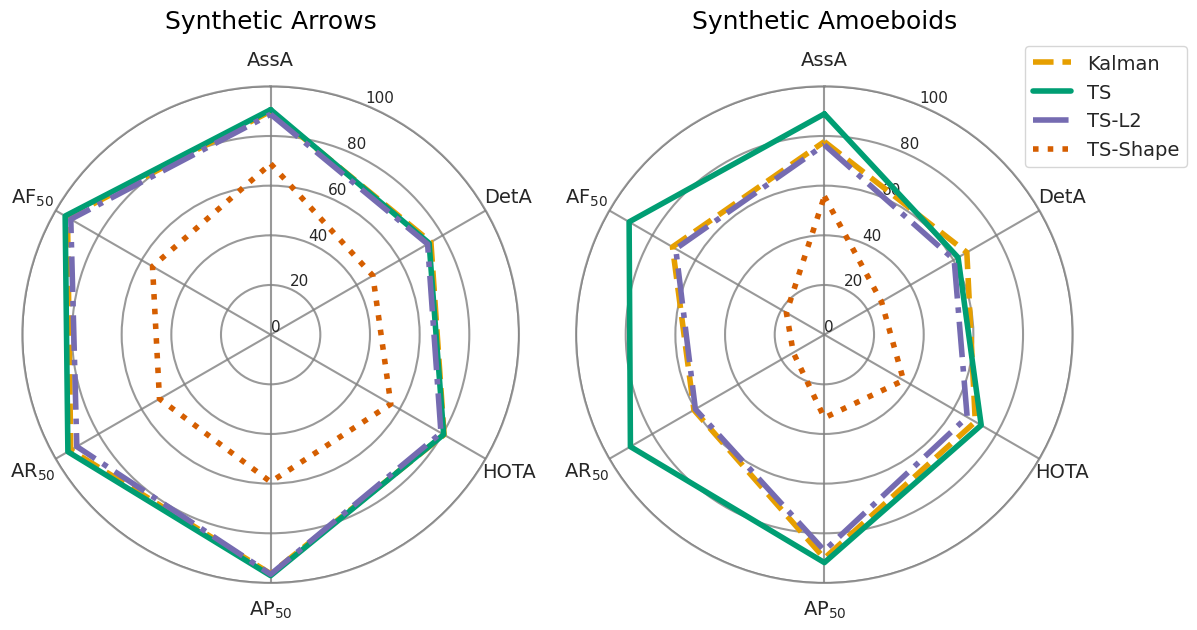

In [34]:
#@title Spider Chart of ASSA for Different Predictors in 'Synthetic Arrows' and Synthetic Amoeboids

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Filter the DataFrame to include only the desired datasets
filtered_datasets = ['Synthetic Arrows','Synthetic Amoeboids']
filtered_df = results_df[results_df['Dataset'].isin(filtered_datasets)]

# Select the metrics you want to include in the radar charts
selected_metrics = ['AssA', 'DetA', 'HOTA', "AP$_{50}$", 'AR$_{50}$', 'AF$_{50}$']

# Initialize a dictionary to hold data for plotting
data_dict = {
    'Dataset': [],
    'Predictor': [],
    'Metric': [],
    'Value': []
}

# Loop over each dataset, predictor, and metric to prepare data
for dataset in filtered_df['Dataset'].unique():
    for predictor in filtered_df['Predictor'].unique():
        for metric in selected_metrics:
            # Extract the value for each combination of Dataset, Predictor, and Metric
            metric_value = filtered_df[
                (filtered_df['Dataset'] == dataset) &
                (filtered_df['Predictor'] == predictor)
            ][metric]

            # If there's data, append it; otherwise, append NaN or 0
            if not metric_value.empty:
                value = np.mean(metric_value)
            else:
                value = np.nan  # or 0, depending on your use case

            data_dict['Dataset'].append(dataset)
            data_dict['Predictor'].append(predictor)
            data_dict['Metric'].append(metric)
            data_dict['Value'].append(value)

# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data_dict)

# Radar chart setup
num_metrics = len(selected_metrics)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # Complete the loop

# Define color palette and line styles for accessibility '#F0E442', '#56B4E9',
colors = [ '#E69F00','#009E73', '#756bb1', '#D55E00']
#colors = ['#009E73','#E69F00', '#756bb1', '#D55E00']
line_styles = [ '--', '-','-.', ':']
line_width = 4  # Increase line width

spider_linewidth = 1.5
spider_color = '#808080'
spider_alpha = 0.8

# Create a radar chart for each dataset
fig, axs = plt.subplots(1, 2, subplot_kw={'polar': True}, figsize=(12, 6))

# Uniform radial limits
radial_limit = 100
tick_interval = 20

for i, dataset in enumerate(filtered_datasets):
    ax = axs[i]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(selected_metrics, fontsize=14)  # Reduce font size for labels
    ax.tick_params(pad=6)

    # Set the radial ticks and limit
    ax.set_ylim(0, radial_limit)
    ax.yaxis.set_tick_params(labelsize=11)
    ax.set_yticks(np.arange(0, radial_limit + tick_interval, tick_interval))

    # Make the spider background (grid lines and circular grid) more visible
    ax.grid(linewidth=spider_linewidth, alpha=spider_alpha, color=spider_color)
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_linewidth(spider_linewidth)
    ax.spines['polar'].set_alpha(spider_alpha)
    ax.spines['polar'].set_color(spider_color)

    for j, predictor in enumerate(filtered_df['Predictor'].unique()):
        values = data_df[(data_df['Dataset'] == dataset) &
                         (data_df['Predictor'] == predictor)]['Value'].tolist()
        values += values[:1]  # Complete the loop

        # Choose a color and line style for each predictor
        color = colors[j % len(colors)]
        linestyle = line_styles[j % len(line_styles)]

        ax.plot(angles, values, linestyle=linestyle, linewidth=line_width, color=color, label=predictor)

    ax.set_title(f"{dataset}", size=18, color='black', y=1.1)  # Smaller title font size

    if i == len(filtered_datasets) - 1:
      ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=14) # Adjust legend position and font size
# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

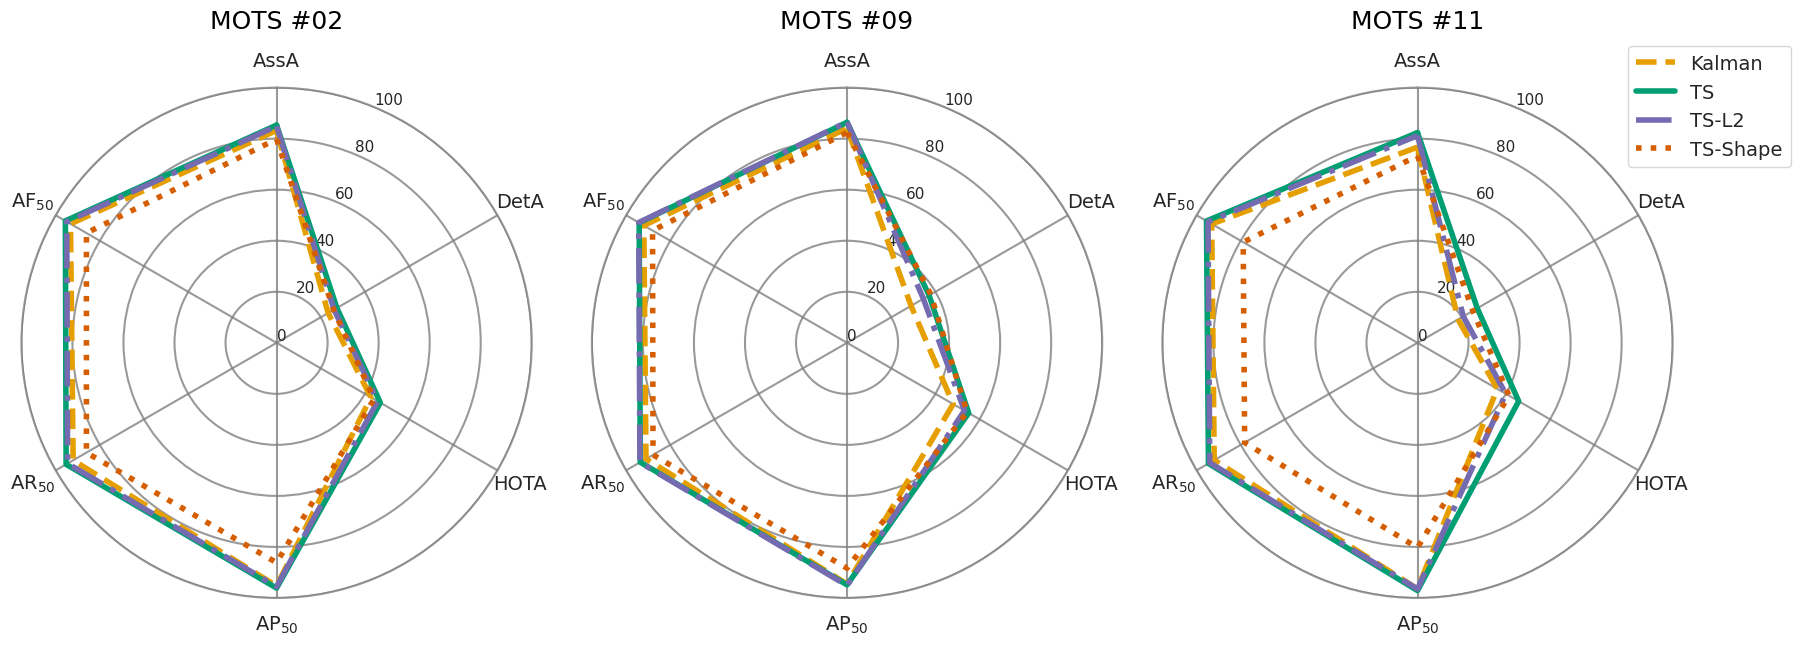

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Filter the DataFrame to include only the 'MOTS' dataset
filtered_df = results_df[results_df['Dataset'] == 'MOTS']

# Identify unique SampleID values
unique_sample_ids = filtered_df['SampleID'].unique()

# Select the metrics you want to include in the radar charts
selected_metrics = ['AssA', 'DetA', 'HOTA', "AP$_{50}$", 'AR$_{50}$', 'AF$_{50}$']

# Initialize a dictionary to hold data for plotting
data_dict = {
    'Dataset': [],
    'Predictor': [],
    'Metric': [],
    'Value': []
}

# Loop over each SampleID, predictor, and metric to prepare data
for sample_id in unique_sample_ids:
    for predictor in filtered_df['Predictor'].unique():
        for metric in selected_metrics:
            # Extract the value for each combination of Dataset, Predictor, and Metric
            metric_value = filtered_df[
                (filtered_df['SampleID'] == sample_id) &
                (filtered_df['Predictor'] == predictor)
            ][metric]

            # If there's data, append it; otherwise, append NaN or 0
            if not metric_value.empty:
                value = np.mean(metric_value)
            else:
                value = np.nan  # or 0, depending on your use case

            data_dict['Dataset'].append(f"MOTS_{sample_id}")  # Combine dataset name and SampleID
            data_dict['Predictor'].append(predictor)
            data_dict['Metric'].append(metric)
            data_dict['Value'].append(value)

# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data_dict)

# Radar chart setup
num_metrics = len(selected_metrics)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # Complete the loop

# Define color palette and line styles
colors = ['#E69F00', '#009E73', '#756bb1', '#D55E00']
line_styles = ['--', '-', '-.', ':']
line_width = 4  # Increase line width

spider_linewidth = 1.5
spider_color = '#808080'
spider_alpha = 0.8

# Create a radar chart for each SampleID
fig, axs = plt.subplots(1, len(unique_sample_ids), subplot_kw={'polar': True}, figsize=(18, 6))

# Uniform radial limits
radial_limit = 100
tick_interval = 20

for i, sample_id in enumerate(unique_sample_ids):
    ax = axs[i]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(selected_metrics, fontsize=14)  # Reduce font size for labels
    ax.tick_params(pad=6)

    # Set the radial ticks and limit
    ax.set_ylim(0, radial_limit)
    ax.yaxis.set_tick_params(labelsize=11)
    ax.set_yticks(np.arange(0, radial_limit + tick_interval, tick_interval))

    # Make the spider background (grid lines and circular grid) more visible
    ax.grid(linewidth=spider_linewidth, alpha=spider_alpha, color=spider_color)
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_linewidth(spider_linewidth)
    ax.spines['polar'].set_alpha(spider_alpha)
    ax.spines['polar'].set_color(spider_color)

    for j, predictor in enumerate(filtered_df['Predictor'].unique()):
        values = data_df[(data_df['Dataset'] == f"MOTS_{sample_id}") &
                         (data_df['Predictor'] == predictor)]['Value'].tolist()
        values += values[:1]  # Complete the loop

        # Choose a color and line style for each predictor
        color = colors[j % len(colors)]
        linestyle = line_styles[j % len(line_styles)]

        ax.plot(angles, values, linestyle=linestyle, linewidth=line_width, color=color, label=predictor)

    ax.set_title(f"MOTS #{sample_id}", size=18, color='black', y=1.1)  # Smaller title font size

    if i == len(unique_sample_ids) - 1:
      ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=14) # Adjust legend position and font size

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


# Numeric results

In [ ]:
import numpy as np

MOTS_results_df = results_df[results_df['Dataset'] == 'MOTS']

print("General MOTS")

for Predictor in MOTS_results_df['Predictor'].unique():
    print(Predictor)
    print(f"Mean HOTA: {np.mean(MOTS_results_df[MOTS_results_df['Predictor'] == Predictor]['HOTA']):.2f}")

print("\nSample-wise MOTS")

for SampleID in MOTS_results_df['SampleID'].unique():
    print(SampleID)
    for Predictor in results_df['Predictor'].unique():
        print(Predictor)
        print(f"Mean HOTA: {np.mean(MOTS_results_df[(MOTS_results_df['Predictor'] == Predictor) & (MOTS_results_df['SampleID'] == SampleID)]['HOTA']):.2f}")

General MOTS
Kalman
Mean HOTA: 41.39
TS
Mean HOTA: 48.56
TS-L2
Mean HOTA: 45.20
TS-Shape
Mean HOTA: 45.55

Sample-wise MOTS
02
Kalman
Mean HOTA: 42.69
TS
Mean HOTA: 46.97
TS-L2
Mean HOTA: 45.73
TS-Shape
Mean HOTA: 44.09
09
Kalman
Mean HOTA: 48.01
TS
Mean HOTA: 55.07
TS-L2
Mean HOTA: 53.14
TS-Shape
Mean HOTA: 54.34
11
Kalman
Mean HOTA: 36.10
TS
Mean HOTA: 45.79
TS-L2
Mean HOTA: 39.95
TS-Shape
Mean HOTA: 41.40


# Saliency map figures

In [ ]:
!wget /path/to/saliency_radial_distributions_AS1_F10.pkl
!wget /path/to/saliency_temporal_distributions_AS1_F10.pkl
!wget /path/to/saliency_radial_distributions_AS1_F10_NPT.pkl
!wget /path/to/saliency_temporal_distributions_AS1_F10_NPT.pkl

import pickle

radial_dists = pickle.load(open('saliency_radial_distributions_AS1_F10.pkl', 'rb'))
temporal_dists = pickle.load(open('saliency_temporal_distributions_AS1_F10.pkl', 'rb'))

radial_dists_npt = pickle.load(open('saliency_radial_distributions_AS1_F10_NPT.pkl', 'rb'))
temporal_dists_npt = pickle.load(open('saliency_temporal_distributions_AS1_F10_NPT.pkl', 'rb'))

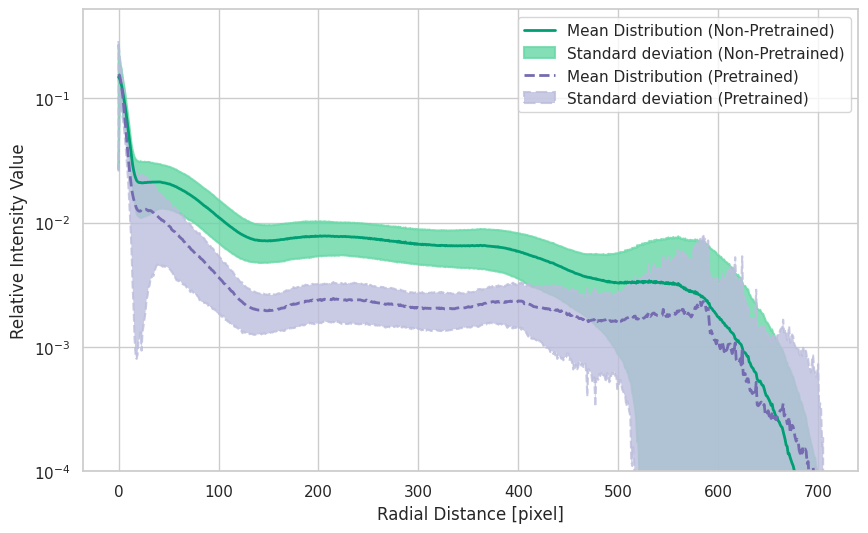

In [44]:
#@title Radial dist

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extend_distributions(distributions):
    # 1. Determine the maximum length
    max_len = max([np.shape(dist)[1] for dist in distributions])

    # 2. Extend each distribution to the max length by padding with zeros
    extended_distributions = [
        np.pad(dist, ((0, 0), (0, max_len - np.shape(dist)[1])), mode='constant', constant_values=0)
        for dist in distributions
    ]

    # Normalize the distributions
    extended_distributions = extended_distributions / np.max(extended_distributions)

    # 3. Calculate the mean and standard deviation across distributions
    mean_distribution = np.mean(extended_distributions, axis=0)
    std_dev_distribution = np.std(extended_distributions, axis=0)

    return mean_distribution, std_dev_distribution

# Extend and calculate mean/std for non-pretrained
mean_distribution_npt, std_dev_distribution_npt = extend_distributions(radial_dists_npt)

# Extend and calculate mean/std for pretrained
mean_distribution_pt, std_dev_distribution_pt = extend_distributions(radial_dists)

# 4. Plot the mean with error bars for both distributions
plt.figure(figsize=(10, 6))

# Plot non-pretrained
plt.plot(mean_distribution_npt.mean(axis=0), label="Mean Distribution (Non-Pretrained)", color='#009E73', linewidth=2)
plt.fill_between(
    np.arange(mean_distribution_npt.shape[1]),
    mean_distribution_npt.mean(axis=0) - std_dev_distribution_npt.mean(axis=0),
    mean_distribution_npt.mean(axis=0) + std_dev_distribution_npt.mean(axis=0),
    color='#66D8A5', alpha=0.8, label='Standard deviation (Non-Pretrained)',
    linewidth = 1.5
)

# Plot pretrained
plt.plot(mean_distribution_pt.mean(axis=0), label="Mean Distribution (Pretrained)", color='#756bb1', linestyle='--', linewidth=2)
plt.fill_between(
    np.arange(mean_distribution_pt.shape[1]),
    mean_distribution_pt.mean(axis=0) - std_dev_distribution_pt.mean(axis=0),
    mean_distribution_pt.mean(axis=0) + std_dev_distribution_pt.mean(axis=0),
    color='#bcbddc', alpha=0.8, label='Standard deviation (Pretrained)',
    linewidth = 1.5, linestyle='--'
)

#plt.title('Saliency Map Radial Distribution of Pretrained vs Non-Pretrained Local Tracking Model')
plt.xlabel('Radial Distance [pixel]')
plt.ylabel('Relative Intensity Value')

plt.yscale('log')
plt.ylim(0.0001)

plt.legend()
plt.show()

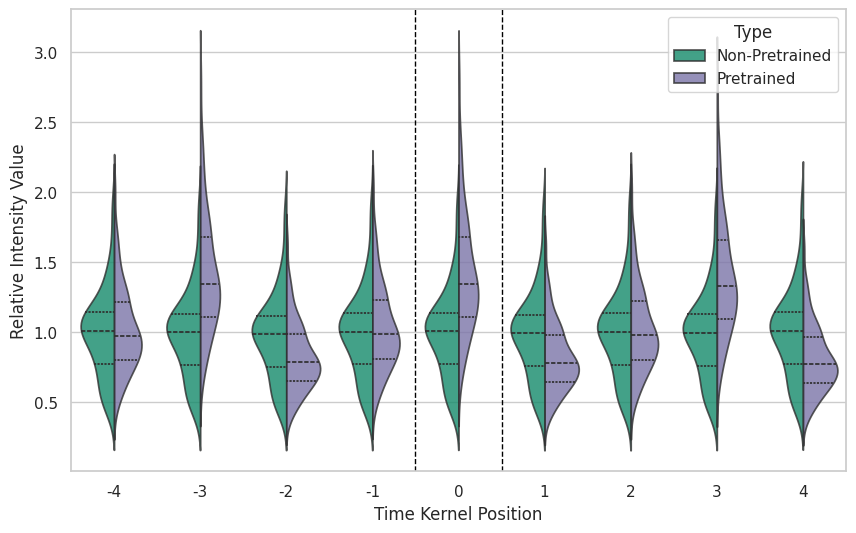

In [51]:
#@title Temporal dist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine non-pretrained and pretrained distributions into one DataFrame
df_npt = pd.DataFrame(temporal_dists_npt).T
df_pt = pd.DataFrame(temporal_dists).T

# Normalize by median
df_npt = df_npt / np.median(df_npt)
df_pt = df_pt / np.median(df_pt)

# Remove the last time point to match the dimensions
df_npt = df_npt[:-1]
df_pt = df_pt[:-1]

# Add a label to distinguish between non-pretrained and pretrained
df_npt['Type'] = 'Non-Pretrained'
df_pt['Type'] = 'Pretrained'

# Combine the normalized DataFrames
df_combined_normalized = pd.concat([df_npt, df_pt])

# Update the Time Point scale from -4 to +4
num_time_points = df_npt.shape[0]
new_time_points = np.arange(-4, 5)  # from -4 to +4

# Melt the DataFrame
df_melted_normalized = df_combined_normalized.melt(id_vars='Type', var_name='Distribution', value_name='Value')
df_melted_normalized['Time Point'] = np.tile(new_time_points, len(temporal_dists_npt) + len(temporal_dists))

# Create the two-sided violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Time Point', y='Value', hue='Type', data=df_melted_normalized, split=True, inner="quart",
               palette={'Non-Pretrained': '#009E73', 'Pretrained': '#756bb1'}, alpha=0.8)

# Draw a marker box around the central (0-th) frame
central_frame = 4
plt.axvline(central_frame - 0.5, color='black', linestyle='--', linewidth=1)  # left boundary
plt.axvline(central_frame + 0.5, color='black', linestyle='--', linewidth=1)  # right boundary

# Plot customization
#plt.title('Relative Temporal Attention Distribution of Pretrained vs Non-Pretrained Local Tracking Model')
plt.xlabel('Time Kernel Position')
plt.ylabel('Relative Intensity Value')

plt.show()



# Pretrained vs Not Pretrained

In [ ]:
!wget /path/to/metric_results_PTvsNPT.pkl

import pickle

results_pt_npt = pickle.load(open('metric_results_PTvsNPT.pkl', 'rb'))

--2024-08-29 19:06:59--  https://users.itk.ppke.hu/~szage11/General%20tracking/ComparativeEvaluation/MetricResults/metric_results_PTvsNPT.pkl
Resolving users.itk.ppke.hu (users.itk.ppke.hu)... 193.225.109.33
Connecting to users.itk.ppke.hu (users.itk.ppke.hu)|193.225.109.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230054 (225K)
Saving to: ‘metric_results_PTvsNPT.pkl’

metric_results_PTvs 100%[===================>] 224.66K  --.-KB/s    in 0.07s   

2024-08-29 19:06:59 (3.29 MB/s) - ‘metric_results_PTvsNPT.pkl’ saved [230054/230054]



In [ ]:
columns_to_multiply = [
    'MOTA', 'MOTP', 'DETA', 'ASSA', 'HOTA', 'Segmentation IOU',
    'Detection Precision', 'Detection Recall', 'Detection F-Score',
    'Association Precision', 'Association Recall', 'Association F-Score',
    'Association Precision Legacy', 'Association Recall Legacy',
    'Association F-Score Legacy'
]

results_pt_npt[columns_to_multiply] = results_pt_npt[columns_to_multiply] * 100

In [ ]:
results_pt = results_pt_npt[results_pt_npt["Predictor"] == "Symmetry_Pretrained"]
results_npt = results_pt_npt[results_pt_npt["Predictor"] == "Symmetry_NonPretrained"]

def calculate_standard_error(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

print("Pretrained")
print(f"Mean HOTA: {np.mean(results_pt['HOTA']):.2f} +- {calculate_standard_error(results_pt['HOTA']):.2f}")
print(f"Mean AssA: {np.mean(results_pt['ASSA']):.2f} +- {calculate_standard_error(results_pt['ASSA']):.2f}")

print("Not Pretrained")
print(f"Mean HOTA: {np.mean(results_npt['HOTA']):.2f} +- {calculate_standard_error(results_npt['HOTA']):.2f}")
print(f"Mean AssA: {np.mean(results_npt['ASSA']):.2f} +- {calculate_standard_error(results_npt['ASSA']):.2f}")


Pretrained
Mean HOTA: 81.24 +- 0.20
Mean AssA: 90.83 +- 0.13
Not Pretrained
Mean HOTA: 80.63 +- 0.21
Mean AssA: 90.25 +- 0.14
